## Install packages

In [ ]:
%pip install --upgrade  langchain langchain-google-genai "langchain[docarray]" faiss-cpu langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install azure-ai-formrecognizer pandas langchain faiss-cpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.4/301.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.3/194.3 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.6 MB/s eta 0:00:00


In [ ]:
import os
import getpass
import requests
from PIL import Image
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain.vectorstores import DocArrayInMemorySearch
from langchain_google_genai import GoogleGenerativeAIEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate

from langchain_text_splitters import CharacterTextSplitter
from langchain.schema.document import Document
from langchain_community.document_loaders import TextLoader

from langchain_core.runnables import RunnableLambda, RunnablePassthrough

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display, Markdown

In [ ]:
from langchain_community.vectorstores import FAISS

## Set API Key

In [ ]:
if "GOOGLE_API_KEY" not in os.environ:
    os.environ["GOOGLE_API_KEY"] = getpass.getpass("Provide your Google API Key")

## Custom Functions to load image

In [ ]:
def get_image(url, filename, extention):
  content = requests.get(url).content
  with open(f'/content/{filename}.{extention}', 'wb') as f:
    f.write(content)
  image = Image.open(f"/content/{filename}.{extention}")
  image.show()
  return image

def get_text_chunks_langchain(text):
  text_splitter = CharacterTextSplitter(chunk_size=20, chunk_overlap=10)
  docs = [Document(page_content=x) for x in text_splitter.split_text(text)]
  return docs

## Test LLM

In [ ]:
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
result = llm.invoke("ที่ท่องเที่ยวในลำปาง")
print(result.content)

## ที่ท่องเที่ยวในลำปาง แบ่งตามประเภท

**วัดวาอาราม:**
* **วัดพระธาตุลำปางหลวง:** วัดคู่บ้านคู่เมืองลำปาง  มีพระธาตุลำปางหลวงเป็นศูนย์รวมใจของชาวลำปาง
* **วัดพระแก้วดอนเต้าสุชาดาราม:** วัดเก่าแก่ประจำเมือง  มีสถาปัตยกรรมงดงาม  เคยเป็นที่ประดิษฐานพระแก้วมรกต
* **วัดเชียงราย:** วัดบนเขาที่มีชื่อเสียงด้านวิวทิวทัศน์  สามารถชมวิวเมืองลำปางได้แบบพาโนรามา
* **วัดจองคำ:** วัดเก่าแก่  มีวิหารโบราณและภาพจิตรกรรมฝาผนังที่สวยงาม
* **วัดศรีชุม:** วัดที่มีชื่อเสียงด้านการหล่อพระ  มีพระพุทธรูปขนาดใหญ่  "พระเจ้าทันใจ" ให้สักการะบูชา

**ธรรมชาติ:**
* **อุทยานแห่งชาติแจ้ซ้อน:** แหล่งท่องเที่ยวทางธรรมชาติ  มีบ่อน้ำพุร้อน  น้ำตก  และเส้นทางศึกษาธรรมชาติ
* **อุทยานแห่งชาติดอยขุนตาล:**  มีจุดชมวิวทะเลหมอก  ยอดดอยที่สวยงาม  และเส้นทางเดินป่า
* **น้ำตกวังแก้ว:** น้ำตกขนาดใหญ่  มีน้ำไหลตลอดปี  เหมาะแก่การพักผ่อนและเล่นน้ำ
* **ถ้ำผานางคอย:** ถ้ำที่มีตำนานเล่าขาน  ภายในมีหินงอกหินย้อยสวยงาม
* **ศูนย์อนุรักษ์ช้างไทย ลำปาง:** สถานที่ท่องเที่ยวเชิงอนุรักษ์  สามารถชมการแสดงของช้าง  และเรียนรู้เกี่ยวกับชีวิตของช้างไ

## LLM chain with Chat

In [ ]:
model = ChatGoogleGenerativeAI(model="gemini-pro")
print(
    model(
    [
        HumanMessage(content="Answer with Simple 'Yes' or 'No'. Question: Is apple a Fruit?"),
    ]
).content
)

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:139: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


Yes


## Multimodal llm chain

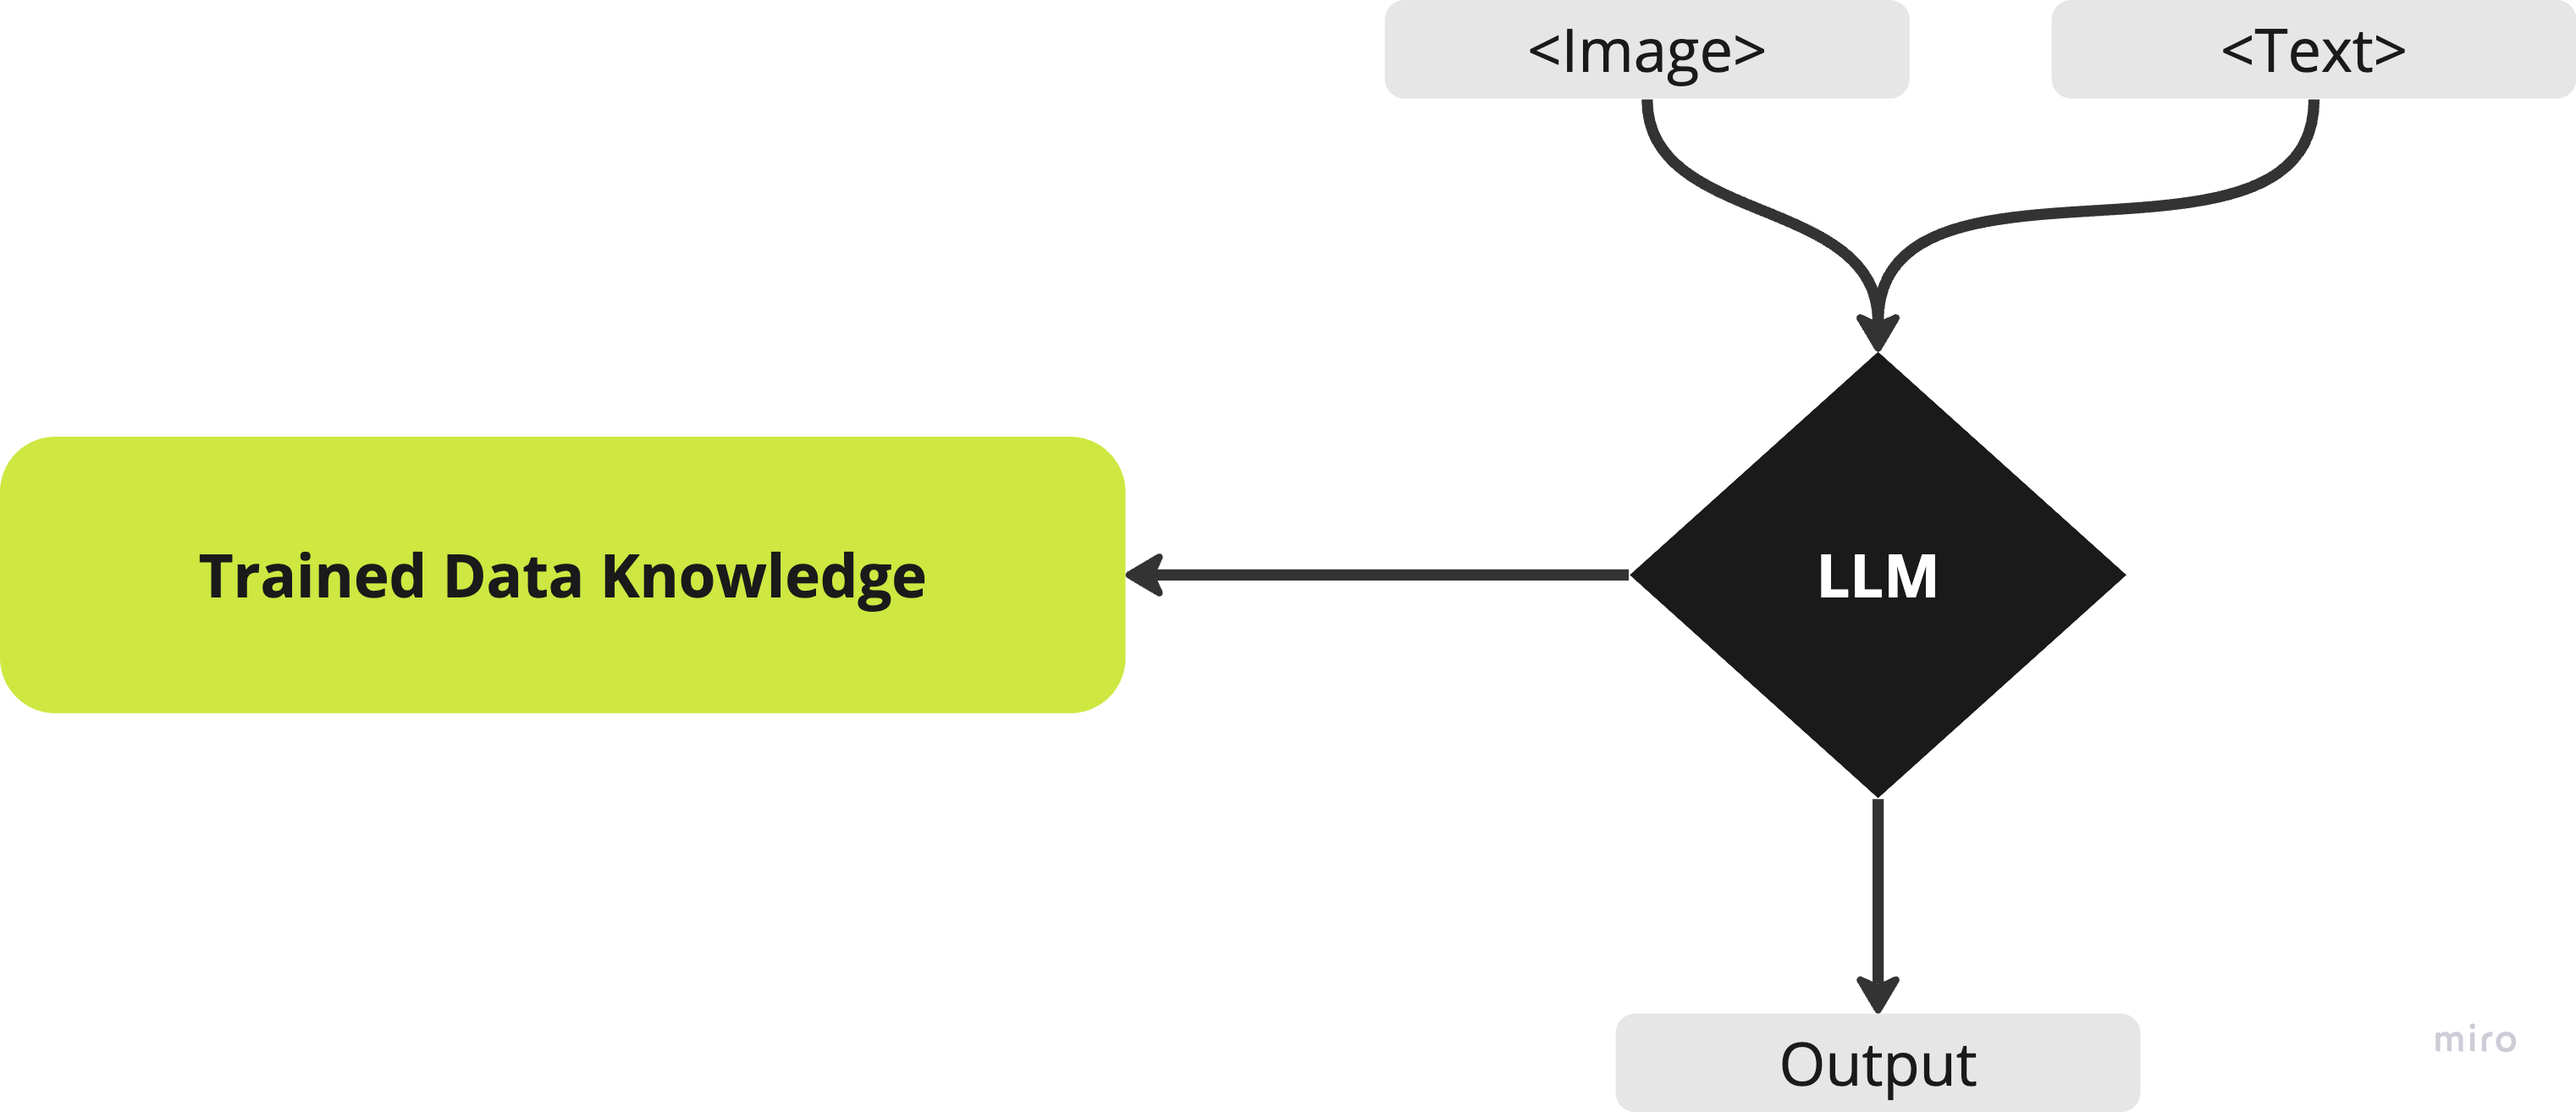

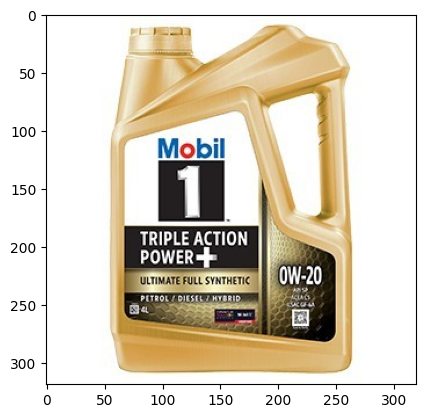

 The product name is Mobil 1 Triple Action Power+. The color of the bottle is gold. The text on the bottle is "Mobil 1", "Triple Action Power+", "Ultimate Full Synthetic", "0W-20", "API SN", "ILSAC GF-6A", "4L". The logo on the bottle is Mobil 1.


In [ ]:
# Fetching the image
image_url = "https://www.mobil.co.th/-/media/project/wep/mobil/mobil-th/product-banners/0w-20/0w-20_square-md-319x319.jpeg"
image = get_image(image_url, "exxon-01", "jpeg")

# Display the image (optional)
plt.imshow(image)
plt.show()

# Prompt for image analysis
prompt_ocr = """
Extract all the details from the image, including product name, color, and any visible text or logos.
"""

# Initialize the Gemini Pro Vision model using LangChain
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": prompt_ocr,
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": image_url},  # Using image URL directly
    ]
)

# Get the analysis from Gemini Pro Vision
result = llm.invoke([message])

# Print the analysis results
print(result.content)

#### Setting up Knowledge base

In [ ]:
import os
from azure.ai.formrecognizer import DocumentAnalysisClient
from azure.core.credentials import AzureKeyCredential
from langchain.vectorstores import FAISS
from langchain.text_splitter import CharacterTextSplitter
from langchain.schema import Document

# Set up Azure Form Recognizer
endpoint = 'https://exxontugoatdi.cognitiveservices.azure.com/'
api_key = '40ed1c5af99c4439a6e5cee00729d205'
document_analysis_client = DocumentAnalysisClient(endpoint, AzureKeyCredential(api_key))

# Directory containing PDF files
pdf_directory = "/content/drive/MyDrive/src/"

# Function to read and extract text from a PDF file
def read_pdf(file_path):
    with open(file_path, "rb") as f:
        poller = document_analysis_client.begin_analyze_document("prebuilt-read", document=f)
        result = poller.result()

    pdf_text = ""
    for page in result.pages:
        for line in page.lines:
            pdf_text += line.content + "\n"
    return pdf_text

# List to store all extracted texts
all_texts = []

# Read all PDF files in the directory
for filename in os.listdir(pdf_directory):
    if filename.endswith(".pdf"):
        pdf_path = os.path.join(pdf_directory, filename)
        extracted_text = read_pdf(pdf_path)

        # Display the extracted text for verification
        print(f"Extracted text from {filename}:\n{extracted_text}\n")

        # Add the extracted text to the list
        all_texts.append(extracted_text)

# Step 3: Create text chunks for each document using langchain
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
docs = [chunk for text in all_texts for chunk in text_splitter.split_documents([Document(page_content=text)])]

# Step 4: Embedding and Vectorstore
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
vectorstore = FAISS.from_documents(docs, embedding=embeddings)
retriever = vectorstore.as_retriever()

Streaming output truncated to the last 5000 lines.
ความสามารถในการแยกตัวกับน้ำที่ยอดเยี่ยม
พร้อมสำหรับการแยกตัวจากน้ำและสิ่งปนเปื้อนตลอดอายุการใช้งานของน้ำมันเพื่อให้การทำงานที่ราบรื่นและลดเวลาที่เครื่องจักรหยุดทำงานเพื่อรับการซ่อมแซม
ยืดระยะเวลาการเปลี่ยนถ่ายน้ำมันและลดค่าใช้จ่ายในการเปลี่ยนน้ำมัน
ความต้านทานต่อการเสื่อมสภาพเนื่องจากออกซิเดชั่นได้ดี ระบบและตัวกรองที่สะอาดขึ้นและลดค่าใช้จ่ายในการบำรุงรักษา
ให้การปกป้องการเกิดสนิมและ
การกัดกร่อนที่ดีเยี่ยม
เพิ่มประสิทธิภาพในการปกป้องอุปกรณ์และยืดอายุการใช้งานของอุปกรณ์
การใช้งาน
น้ำมันหล่อลื่น Mobil Vacuoline 100 ซีรีส์ได้รับการแนะนำและใช้งานเป็นพิเศษสำหรับการใช้งานในโรงรีดเหล็ก น้ำมันหล่อลื่นนี้เหมาะสำหรับ:
· แบริ่งลูกกลิ้งสำรองของโรงรีดเหล็ก โดยเฉพาะระบบแบริ่งที่ใช้ถังเดียวหรือถังคู่
· ระบบแบริ่งชั้นฟิลม์แบบสมบูรณ์และการใช้งานที่คล้ายกันในอุตสาหกรรมอื่นๆ โดยเฉพาะการใช้งานที่แบริ่งที่อาจพบการปนเปื้อนของน้ำสูง
ข้อกำหนดและการรับรอง
ผลิตภัณฑ์นี้ผ่านหรือเกินกว่าข้อกำหนดของ:
128 133 137 146 148
DIN 51517-2:2018-09
X X
X
X
รายละเอียดทางเทคนิ

In [ ]:
retriever.invoke("slides")

[Document(page_content="1. น้ำมันหล่อลื่นและผลิตภัณฑ์หล่อลื่นจาก MobiI'M | เว็บไซต์อย่างเป็นทางการของ MobilIMประเทศไทย\n2. ผลิตภัณฑ์จาก Mobil'M\n3. Mobilith SHC Series\nคุณสมบัติในการทำงานทั้งหมดของเว็บไซต์อาจไม่มีจัดไว้ให้จากการปรับแต่งค่าการใช้คุ้กกี้ของคุณ คลิกที่นี่เพื่ออัพเดตค่าปรับตั้ง\nMobilith SHC Series\nจาระบี\nจาระบี Mobilith SHCTM Series เป็นผลิตภัณฑ์ประสิทธิภาพสูงที่ออกแบบมาสำหรับการใช้งานหลากหลายในสภาพแวดล้อมอุณหภูมิขั้นสุด\nผลิตภัณฑ์ชนิดนี้ผสานรวมคุณลักษณะที่เป็นเอกลักษณ์ของน้ำมันหล่อลื่นพื้นฐานสังเคราะห์พร้อมกับเนื้อจาระบีลิเธียมคอมเพล็กซ์คุณภาพสูง\nลักษณะน้ำมันหล่อลื่นที่ปราศจากไขและสัมประสิทธิ์การฉุดลากที่ต่ำ (เปรียบเทียบกับน้ำมันแร่) ให้ความสามารถในการสูบจ่ายที่อุณหภูมิต่ำอย่างยอดเยี่ยม และแรงบิดเริ่มต้นและแรงบิดขณะทำงานที่ต่ำมาก\nผลิตภัณฑ์กลุ่มนี้ให้การประหยัดพลังงานและสามารถลดอุณหภูมิการใช้งานในพื้นที่รับโหลดของแบริ่งลูกกลิ้งทรงกลมและบอลแบริ่ง เนื้อจาระบีลิเธียมคอมเพล็กซ์ช่วยในการยึดเกาะที่ดีเยี่ยม\nความเสถียรเชิงโครงสร้างและต้านทานต่อน้ำ จาระบีมีความเสถียรทางเคมีใ

#### Text RAG

In [91]:
llm_text = ChatGoogleGenerativeAI(model="gemini-1.5-pro")
template = """
```
{context}
```

{information}

You are ExxonMobil Employ try to sell product
Provide ExxonMobilThailand information and store location.
ถ้าลูกค้าถามน้ำมันที่เหมาะกับรถตัวเองให้แนะนำ 3 product พร้อมเปรียบเทียบกัน
ใช้ emoji บางครั้งให้ดูเป็นกันเอง
อธิบายให้เข้าใจง่ายแล้วเห็นภาพ
"""
prompt = ChatPromptTemplate.from_template(template)

rag_chain = (
    {"context": retriever, "information": RunnablePassthrough()}
    | prompt
    | llm_text
    | StrOutputParser()
)

#### RAG with Text and Image

In [ ]:
llm_vision = ChatGoogleGenerativeAI(model="gemini-pro-vision", temperature=0.0)
full_chain = (
    RunnablePassthrough() | llm_vision | StrOutputParser() | rag_chain
)

### Result

In [94]:
result = rag_chain.invoke("ขอคุณสมบัติและคุณลักษณะที่กำหนดของMobil Delvac Super 20W-50")
display(Markdown(result))

สวัสดีครับ 🙏  สนใจ **Mobil Delvac Super 20W-50**  อยู่ใช่ไหมครับ 👍 น้ำมันเครื่องตัวนี้ขึ้นชื่อเรื่องความอึด ถึก ทนทาน เหมาะกับรถบรรทุกหนัก เครื่องยนต์ดีเซล ที่ต้องทำงานหนักๆ เป็นที่สุด 💪

**คุณสมบัติของ Mobil Delvac Super 20W-50 ที่โดดเด่น 💪**

* **เกรด:** SAE 20W-50 🌡️ (เหมาะกับอากาศร้อนๆ ในบ้านเรา)
* **เถ้าซัลเฟต:** 0.8%  (ช่วยลดการสึกหรอของเครื่องยนต์ได้ดี)
* **ความหนาแน่น:** 0.88 g/cm3  (การไหลเวียนของน้ำมันเครื่องดีเยี่ยม)
* **จุดวาบไฟ:** 244 °C 🔥 (ทนความร้อนสูง ป้องกันการระเหย) 
* **ความหนืด:**  17.6 mm2/s @ 100°C (หล่อลื่นได้ดีเยี่ยมในทุกสภาวะ)
* **จุดไหลเท:** -30 °C ❄️ (สตาร์ทติดง่ายในอุณหภูมิต่ำ)

**สรุปง่ายๆ คือ Mobil Delvac Super 20W-50 ช่วยให้...**

* เครื่องยนต์สะอาด 🧹
* ยืดอายุการใช้งานเครื่องยนต์ ⏳
* ประหยัดน้ำมันเชื้อเพลิง ⛽
* ลดค่าบำรุงรักษา 💰

**แต่...** เพื่อให้มั่นใจว่าน้ำมันตัวนี้เหมาะกับรถของคุณจริงๆ รบกวนขอข้อมูลรถหน่อยได้ไหมครับ?  🧐  เช่น ยี่ห้อ รุ่น ปี  

**พิเศษ!**  ผมมีน้ำมันเครื่องอีก 3 ตัวที่อยากแนะนำ  🤩

1. **Mobil Delvac 1 ESP 5W-40:**  ตัวท็อป!  ประหยัดน้ำมัน ปกป้องเครื่องยนต์ขั้นสุด  ✨
2. **Mobil Delvac MX 15W-40:**   คุ้มค่า คุ้มราคา  ปกป้องดีเยี่ยมในราคาประหยัด 😉
3. **Mobil 1 FS 0W-40:**   สำหรับรถเบนซิน  แรง เร็ว ปกป้องเต็มพลัง  🚀

ลองเปรียบเทียบดูนะครับ  😊  หรือถ้าอยากได้คำแนะนำเพิ่มเติม  ติดต่อผมได้เลยครับ ยินดีให้บริการครับ 😄

**ExxonMobil Thailand** 
**Website:**  [ใส่ website ExxonMobil Thailand]
**Facebook:**  [ใส่ Facebook ExxonMobil Thailand]
**Line Official:**  [ใส่ Line Official ExxonMobil Thailand]

**สาขาใกล้บ้านท่าน:**  (รบกวนขอทราบจังหวัดที่ท่านอยู่ด้วยนะครับ 🙏) 

**ยินดีให้บริการครับ** 😄
